Video Game Analysis


Data Prepocessing

In [22]:
import numpy as np
import pandas as pd

videogame_sales_2024_df = pd.read_csv("vgchartz-2024.csv", sep=',', decimal='.')
videogame_sales_2024_df_cleaned = videogame_sales_2024_df.drop_duplicates()
videogame_sales_2024_df_cleaned["release_date"] = pd.to_datetime(videogame_sales_2024_df_cleaned["release_date"])
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[["title" ,"console", "genre", "total_sales", "na_sales", "jp_sales", "pal_sales","other_sales","release_date", "critic_score"]]
videogame_sales_2024_df_cleaned["na_sales"] = videogame_sales_2024_df_cleaned["na_sales"].fillna(videogame_sales_2024_df_cleaned["na_sales"].mean())
videogame_sales_2024_df_cleaned["jp_sales"] = videogame_sales_2024_df_cleaned["jp_sales"].fillna(videogame_sales_2024_df_cleaned["jp_sales"].mean())
videogame_sales_2024_df_cleaned["pal_sales"] = videogame_sales_2024_df_cleaned["pal_sales"].fillna(videogame_sales_2024_df_cleaned["pal_sales"].mean())
videogame_sales_2024_df_cleaned["other_sales"] = videogame_sales_2024_df_cleaned["other_sales"].fillna(videogame_sales_2024_df_cleaned["other_sales"].mean())
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["genre"] != "Misc"] #Too many Nan data


In [8]:
import numpy as np
import pandas as pd

video_games_sales_df = pd.read_csv("video_games_sales.csv", sep=',', decimal='.')
video_games_sales_df_cleaned = video_games_sales_df.drop_duplicates()
video_games_sales_df_cleaned = video_games_sales_df_cleaned.dropna(subset=['year', 'genre', 'jp_sales', 'eu_sales'])
video_games_sales_df_cleaned = video_games_sales_df_cleaned[["name" ,"platform", "genre", "na_sales", "jp_sales", "eu_sales", "year"]]
video_games_sales_df_cleaned = video_games_sales_df_cleaned[video_games_sales_df_cleaned["year"] > 2010]

In [9]:
import numpy as np
import pandas as pd

def mean(val):
    numbers = val.split('-')                
    return (float(numbers[0].strip()) + float(numbers[1].strip())) / 2       

steam_games_beforemarch2025 = pd.read_csv("games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned[['user_score', 'genres', 'estimated_owners']]
steam_games_beforemarch2025_cleaned["estimated_owners"] = steam_games_beforemarch2025_cleaned["estimated_owners"].apply(mean)

Graphs

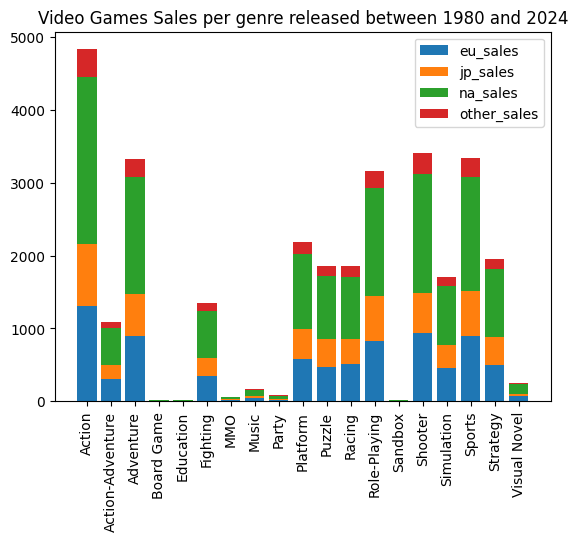

In [23]:
import matplotlib.pyplot as plt
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['genre'])
salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "jp_sales", "na_sales", "pal_sales", "other_sales"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).sum().reset_index()

plt.bar(salesPerGenre["genre"], salesPerGenre["pal_sales"], label="eu_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["jp_sales"], bottom = salesPerGenre["pal_sales"], label="jp_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["na_sales"], bottom = salesPerGenre["pal_sales"] + salesPerGenre["jp_sales"], label="na_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["other_sales"], bottom = salesPerGenre["pal_sales"] + salesPerGenre["jp_sales"] + salesPerGenre["na_sales"], label="other_sales")

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("Video Games Sales per genre released between 1980 and 2024")
plt.show()

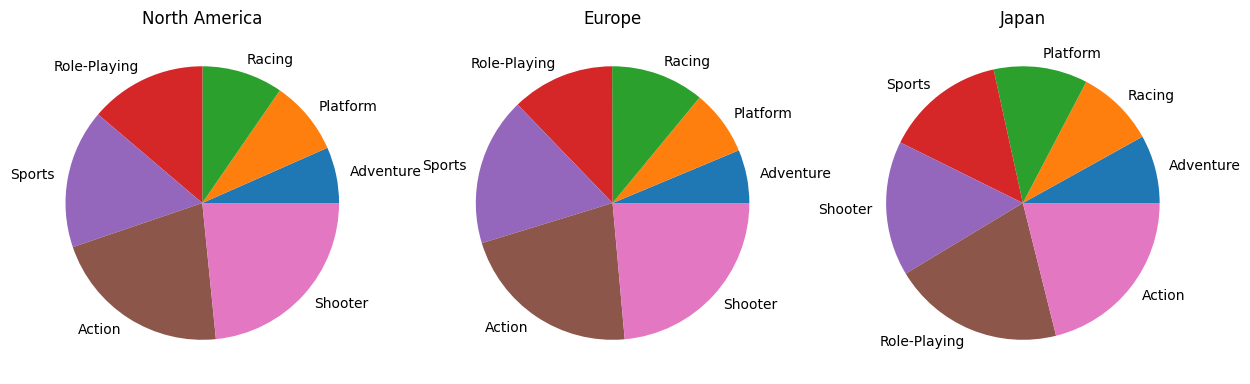

In [28]:
import matplotlib.pyplot as plt
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['genre'])
salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "jp_sales", "na_sales", "pal_sales"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).sum().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 ligne, 2 colonnes
salesPerGenre = salesPerGenre.sort_values(by = "na_sales")
axes[0].pie(salesPerGenre["na_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[0].set_title('North America')

salesPerGenre = salesPerGenre.sort_values(by = "pal_sales")
axes[1].pie(salesPerGenre["pal_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[1].set_title('Europe')

salesPerGenre = salesPerGenre.sort_values(by = "jp_sales")
axes[2].pie(salesPerGenre["jp_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[2].set_title('Japan')

plt.show()


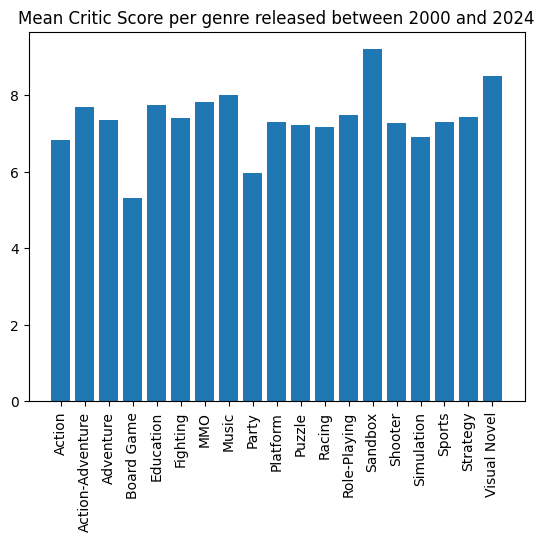

In [30]:
import matplotlib.pyplot as plt
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['critic_score', 'genre'])
salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "critic_score"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).mean().reset_index()
plt.bar(salesPerGenre["genre"], salesPerGenre["critic_score"], label="critic_score")
plt.xticks(rotation=90)
plt.title("Mean Critic Score per genre released between 2000 and 2024")
plt.show()